# Numeraire Price

by: Widya Meiriska

### 1. Read Dataset

In [11]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/bitcoin/numeraire_price.csv',parse_dates = ['Date'])

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
25,"Aug 11, 2017",26.46,41.47,26.06,33.64,"3,202,390","33,143,700"
26,"Aug 10, 2017",28.84,29.21,26.46,26.46,"748,370","36,136,200"
27,"Aug 09, 2017",27.96,33.04,26.79,29.24,"1,128,830","35,034,100"
28,"Aug 08, 2017",27.86,28.34,25.22,27.97,"521,900","34,067,900"
29,"Aug 07, 2017",28.32,30.01,26.70,27.93,"456,117","34,625,700"


### 2. Data Investigation

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          30
Open          30
High          30
Low           30
Close         30
Volume        30
Market Cap    30
dtype: int64

In [5]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

#### There is no missing data here and there are several data which have different format. Some of the data do not use number format

In [6]:
df['Volume'] = df['Volume'].apply(lambda x: float(str(x).replace(',',''))) 
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',',''))) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Date          30 non-null datetime64[ns]
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null float64
Market Cap    30 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.7 KB


In [8]:
df.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
25,2017-08-11,26.46,41.47,26.06,33.64,3202390.0,33143700.0
26,2017-08-10,28.84,29.21,26.46,26.46,748370.0,36136200.0
27,2017-08-09,27.96,33.04,26.79,29.24,1128830.0,35034100.0
28,2017-08-08,27.86,28.34,25.22,27.97,521900.0,34067900.0
29,2017-08-07,28.32,30.01,26.70,27.93,456117.0,34625700.0


In [9]:
missingdf = pd.DataFrame(df.isna().sum()).rename(columns = {0: 'total'})
missingdf['percent'] = missingdf['total'] / len(df)
missingdf

,total,percent
Date,0,0.0
Open,0,0.0
High,0,0.0
Low,0,0.0
Close,0,0.0
Volume,0,0.0
Market Cap,0,0.0


In [13]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,33.311333,36.487333,30.395667,33.009667,9.233835e+05,4.166209e+07
std,4.740261,5.773530,4.509950,5.114229,7.136879e+05,6.007867e+06
min,20.870000,23.620000,17.990000,20.740000,3.498850e+05,2.611580e+07
25%,29.447500,33.755000,26.790000,29.737500,4.721230e+05,3.689638e+07
50%,34.800000,36.925000,31.895000,34.745000,6.750460e+05,4.359285e+07
75%,35.560000,38.277500,33.525000,35.590000,9.848892e+05,4.454140e+07
max,43.830000,48.730000,34.850000,43.370000,3.202390e+06,5.491300e+07


#### Now the data is clean, no null value and has same format

### 3. Data Visualization

In [10]:
# Set Date as it's index
df.set_index('Date', inplace = True )

Text(0.5,1,'Date vs Volume')

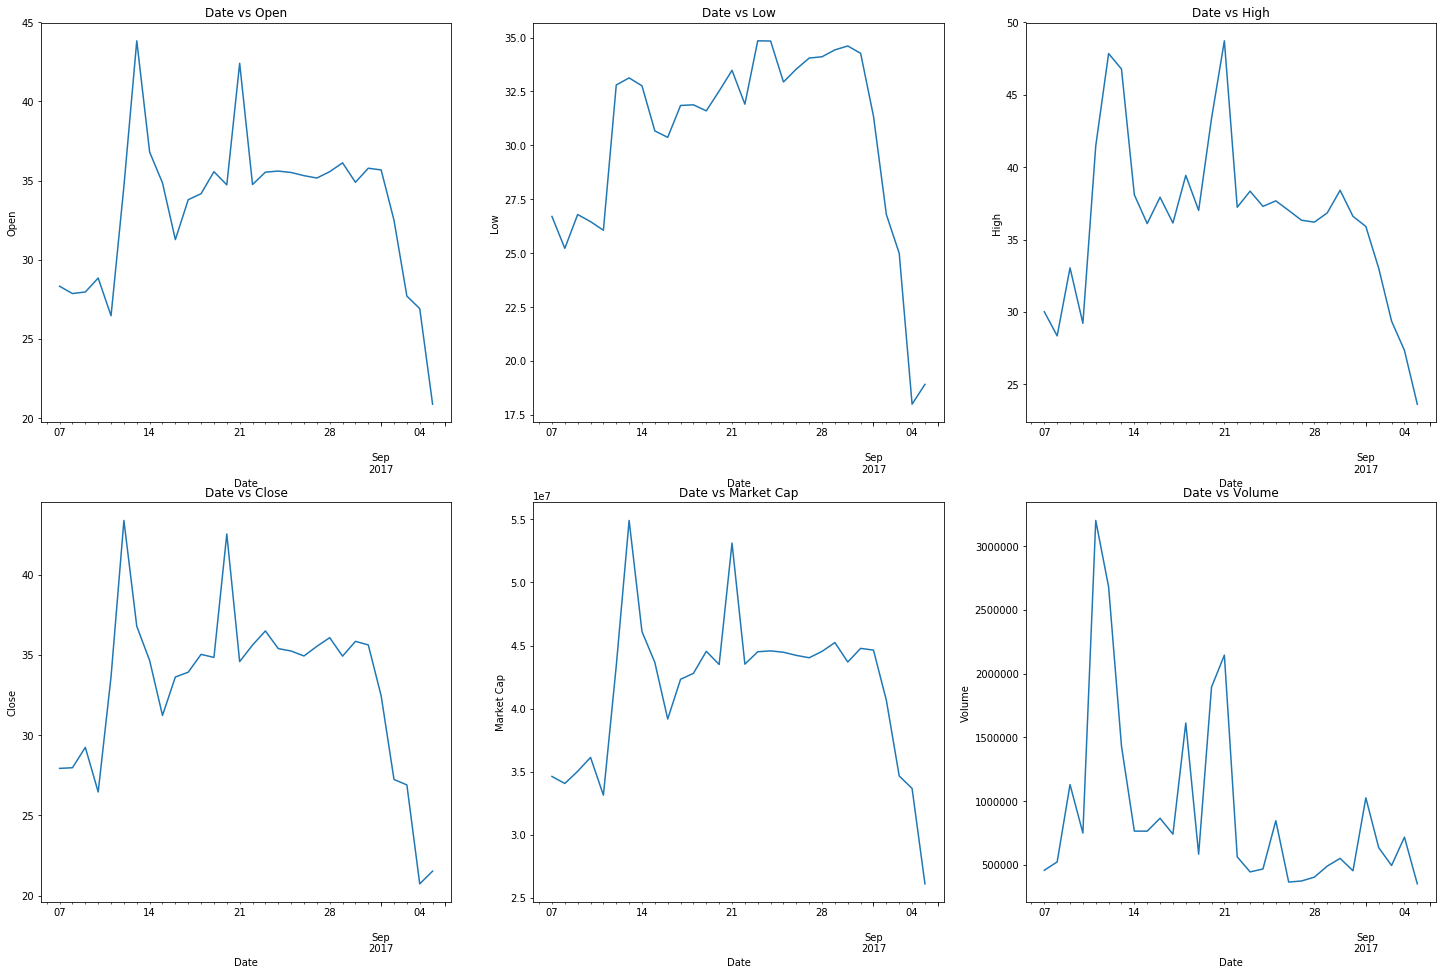

In [12]:
# Visualization the average of Open based on time (Week)
%matplotlib inline
plt.figure(figsize=(25, 25))

plt.subplot(3,3,1)
plt.ylabel('Open')
df.Open.plot()
plt.title('Date vs Open')

plt.subplot(3,3,2)
plt.ylabel('Low')
df.Low.plot()
plt.title('Date vs Low')

plt.subplot(3,3,3)
plt.ylabel('High')
df.High.plot()
plt.title('Date vs High')

plt.subplot(3,3,4)
plt.ylabel('Close')
df.Close.plot()
plt.title('Date vs Close')

plt.subplot(3,3,5)
plt.ylabel('Market Cap')
df['Market Cap'].plot()
plt.title('Date vs Market Cap')

plt.subplot(3,3,6)
plt.ylabel('Volume')
df['Volume'].plot()
plt.title('Date vs Volume')